### Supervised learning -Generalized Linear Models
##### suggested readings:An Introduction to Statistical Learning(http://www-bcf.usc.edu/~gareth/ISL/) ,youtube series(http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
##### Robert Nau notes(http://people.duke.edu/~rnau/regintro.htm)

##### The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the input variables.
#####  In mathematical notion, if ^𝑦(pronounced as y-hat) is the predicted value. ^𝑦(𝑤, 𝑥) = 𝑤0 + 𝑤1𝑥1 + ... + 𝑤𝑝𝑥𝑝

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl 
%  matplotlib inline
current_palette = sns.color_palette("Set2")
sns.set_palette(current_palette)
np.set_printoptions(suppress=True, precision=3)
pd.set_option("display.precision",3)
#plt.style.use('fivethirtyeight')
#SMALL_SIZE = 8
#mpl.rcParams['font.size'] = 12
#mpl.rcParams['legend.fontsize'] = 'small'
#mpl.rcParams['figure.titlesize'] = 'small'

In [2]:
from sklearn.datasets import load_boston
boston =  load_boston()
data = pd.DataFrame(data = boston.data , columns =boston.feature_names)  
target = pd.DataFrame(data = boston.target ,columns =['MEDV'] )


In [3]:
boston_dataset  =pd.concat([data,target],axis=1)

In [4]:
print(boston_dataset.shape)
print(data.shape)
print(target.shape)   

(506, 14)
(506, 13)
(506, 1)


In [5]:
def reg_plots(train_dataset,continuous_features,target_name):
    fig = plt.figure(figsize=(12, 8),dpi=300)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    size =len(continuous_features)
     
    for i in range(size):
        ax = fig.add_subplot(3,5, i+1)
        
        if continuous_features[i] !=target_name:
            sns.regplot( x=continuous_features[i],y=target_name, data =train_dataset ,ax=ax,
                        scatter_kws={'cmap':'jet',"alpha": 0.7}  )
            sns.despine()
    plt.tight_layout()
    plt.show()

In [6]:
feature_names =list(boston.feature_names)
target_name ='MEDV'

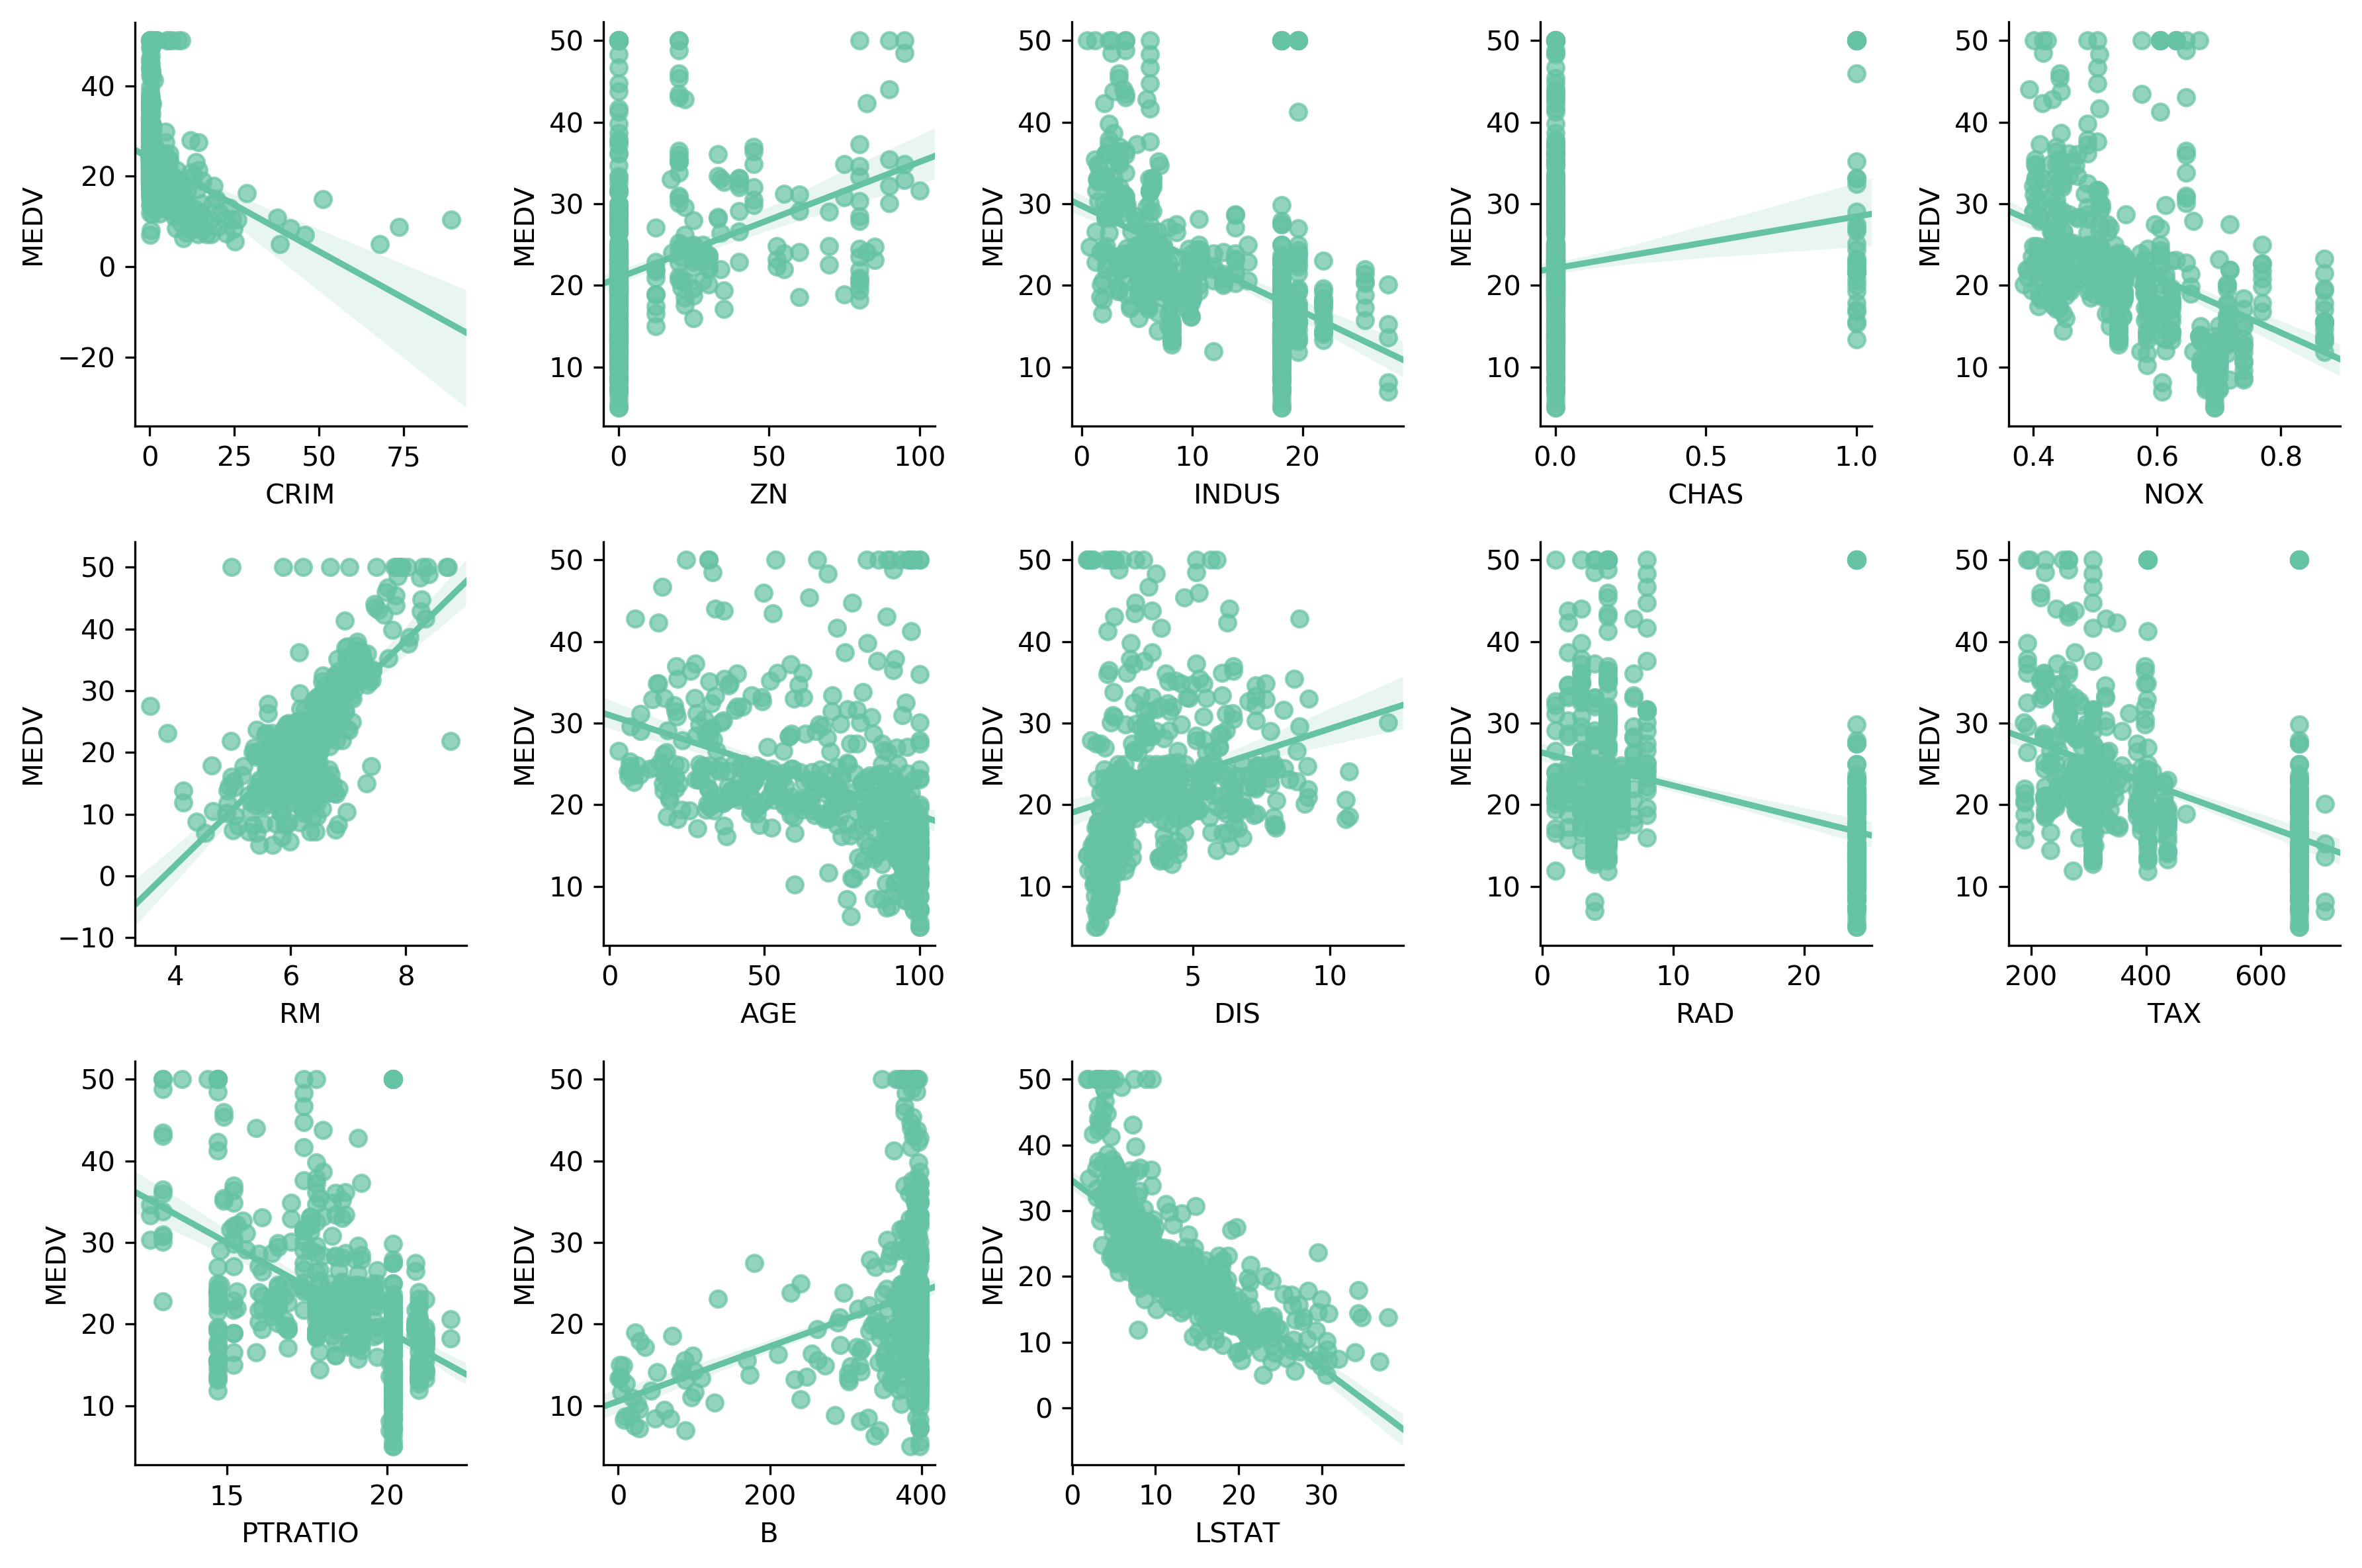

In [7]:
reg_plots(boston_dataset,feature_names,target_name)

### Ordinary Least Squares
#### LinearRegression:Fits a linear model with coefficients 𝑤 = (𝑤1, ...,𝑤𝑝) to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.
#### LinearRegression will take in its fit method arrays X, y and will store the coefficients 𝑤 of the linear model in its coef_ member
#### Ridge Regression:Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. 


In [8]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(data,target,random_state=42)

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge 

lr_scores  = np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))
print("Linear Regression scores:{0}".format(lr_scores))
ridge_scores  = np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))
print("Ridge Regression scores:{0}".format(ridge_scores))

Linear Regression scores:0.7160579492011183
Ridge Regression scores:0.7140855225976978


#### Grid Search

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha' :np.logspace(-3,3,13)}

def create_grid_fit(X,y,model,params):
    grid = GridSearchCV(model,params, cv=10, return_train_score=True, iid=False)
    grid.fit(X,y)
    return grid

ridge_grid = create_grid_fit(X_train,y_train,Ridge(),param_grid)
results = pd.DataFrame(ridge_grid.cv_results_)

In [11]:
#CheckPoint

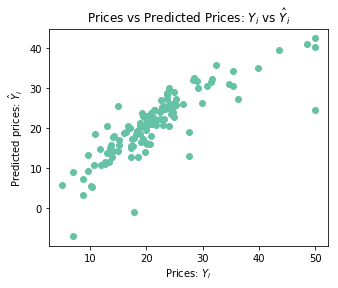

In [12]:
def real_vs_predict(real ,predicted):
    fig = plt.figure(figsize=(5, 4))
    ax = fig.gca()
    ax.scatter(real, predicted)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")
    plt.show()
best_ridge = ridge_grid.best_estimator_
y_pred= best_ridge.predict(X_test)
real_vs_predict(y_test,y_pred)

In [13]:
def get_estimated_coeff(columns,coeff):
    return pd.DataFrame(list(zip(columns.tolist(),best_ridge.coef_.tolist()[0]))  
                              ,columns=['features', 'estimatedCoefficients'])
     
estimate_coeff =get_estimated_coeff(X_train.columns,best_ridge.coef_)
estimate_coeff

,features,estimatedCoefficients
0,CRIM,-0.127
1,ZN,0.030
2,INDUS,0.044
3,CHAS,2.743
4,NOX,-15.005
5,RM,4.366
6,AGE,-0.010
7,DIS,-1.383
8,RAD,0.255
9,TAX,-0.010


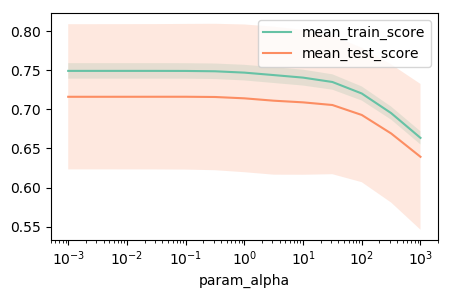

In [14]:
def plot_results(results):
    fig = plt.figure(figsize=(5, 3),dpi=100)
    results.plot('param_alpha', 'mean_train_score',ax=fig.gca())
    results.plot('param_alpha', 'mean_test_score', ax=fig.gca())
    plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
    plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
    plt.legend()
    plt.xscale("log")
    
plot_results(results)

In [15]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003,7.805e-04,7.998e-04,3.999e-04,0.001,{'alpha': 0.001},0.783,0.703,0.556,0.733,...,0.766,0.747,0.735,0.752,0.738,0.749,0.744,0.765,0.749,0.01
1,0.003,8.712e-04,4.999e-04,4.999e-04,0.00316,{'alpha': 0.0031622776601683794},0.783,0.703,0.556,0.733,...,0.766,0.747,0.735,0.752,0.738,0.749,0.744,0.765,0.749,0.01
2,0.003,7.480e-04,4.003e-04,4.903e-04,0.01,{'alpha': 0.01},0.783,0.703,0.556,0.733,...,0.766,0.747,0.735,0.752,0.738,0.749,0.744,0.765,0.749,0.01
3,0.003,4.580e-04,7.000e-04,4.582e-04,0.0316,{'alpha': 0.03162277660168379},0.783,0.703,0.556,0.735,...,0.766,0.747,0.735,0.752,0.738,0.749,0.744,0.765,0.749,0.01
4,0.003,7.743e-04,4.997e-04,4.997e-04,0.1,{'alpha': 0.1},0.782,0.702,0.555,0.738,...,0.766,0.747,0.735,0.752,0.738,0.749,0.744,0.765,0.749,0.01


Best score: 0.716
Best parameters set:
Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


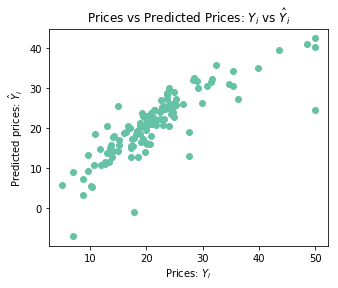

In [16]:
print("Best score: %0.3f" % ridge_grid.best_score_)
print("Best parameters set:")
best_estimator = ridge_grid.best_estimator_
print(best_estimator)
y_pred= best_estimator.predict(X_test)
real_vs_predict(y_test,y_pred)

#### Adding features and scaling

In [17]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
std_scaler = StandardScaler()
std_scaler.fit_transform(X_train)
X_train_std =std_scaler.transform(X_train)
X_test_std =std_scaler.transform(X_test)
poly_features = PolynomialFeatures()
X_train_poly =poly_features.fit_transform(X_train_std)
X_test_poly  = poly_features.transform(X_test_std)

In [18]:
ridge_poly_grid = create_grid_fit(X_train_poly,y_train,Ridge(),param_grid)
poly_results = pd.DataFrame(ridge_poly_grid.cv_results_)
poly_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003,7.002e-04,4.994e-04,6.697e-04,0.001,{'alpha': 0.001},0.546,0.785,0.819,0.849,...,0.947,0.948,0.945,0.948,0.944,0.947,0.948,0.950,0.947,0.002
1,0.003,3.995e-04,3.998e-04,4.896e-04,0.00316,{'alpha': 0.0031622776601683794},0.548,0.784,0.818,0.849,...,0.947,0.948,0.945,0.948,0.944,0.947,0.948,0.950,0.947,0.002
2,0.003,5.998e-04,7.997e-04,3.998e-04,0.01,{'alpha': 0.01},0.548,0.784,0.817,0.848,...,0.947,0.948,0.945,0.947,0.944,0.947,0.948,0.950,0.947,0.002
3,0.002,4.996e-04,7.995e-04,3.997e-04,0.0316,{'alpha': 0.03162277660168379},0.548,0.784,0.816,0.846,...,0.946,0.948,0.944,0.947,0.944,0.947,0.948,0.950,0.947,0.002
4,0.003,5.381e-04,3.997e-04,4.896e-04,0.1,{'alpha': 0.1},0.548,0.788,0.814,0.845,...,0.946,0.948,0.944,0.947,0.944,0.946,0.947,0.949,0.947,0.002


Best score: 0.856
Best parameters set:
Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
{'alpha': 10.0}
0.855834093346858
104


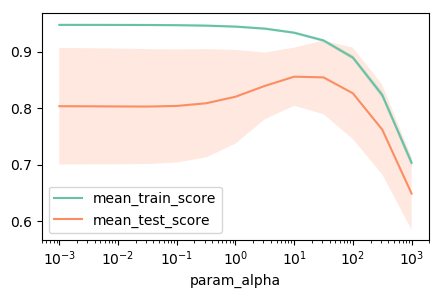

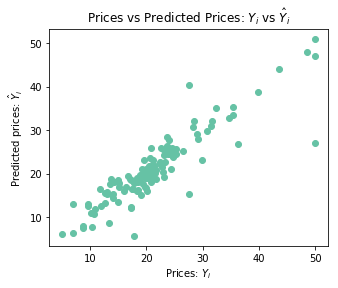

In [19]:
def print_model_details(model,results):
    print("Best score: %0.3f" % model.best_score_)
    print("Best parameters set:")
    print(model.best_estimator_)
    print(model.best_params_)
    print(model.best_score_)
    print((model.best_estimator_.coef_!= 0).sum())
    plot_results(results)

print_model_details(ridge_poly_grid,poly_results)
best_estimator = ridge_poly_grid.best_estimator_
y_pred= best_estimator.predict(X_test_poly)
real_vs_predict(y_test,y_pred)

In [20]:
from sklearn.linear_model import Lasso, RidgeCV, LassoCV

In [21]:
lasso = Lasso(normalize=True, max_iter=1e6)
lasso_poly_grid = create_grid_fit(X_train_poly,y_train,lasso,param_grid)
lasso_poly_results = pd.DataFrame(lasso_poly_grid.cv_results_)
lasso_poly_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.089,1.433e-01,2.000e-04,3.999e-04,0.001,{'alpha': 0.001},0.683,0.834,0.759,0.845,...,0.937,0.938,0.932,0.937,0.935,0.937,0.937,0.940,0.937,0.003
1,0.009,9.161e-04,6.998e-04,4.581e-04,0.00316,{'alpha': 0.0031622776601683794},0.862,0.877,0.675,0.822,...,0.923,0.924,0.917,0.923,0.919,0.922,0.922,0.927,0.922,0.003
2,0.009,2.374e-03,7.995e-04,3.998e-04,0.01,{'alpha': 0.01},0.884,0.875,0.532,0.795,...,0.891,0.897,0.886,0.891,0.885,0.892,0.891,0.891,0.890,0.003
3,0.004,9.429e-04,6.996e-04,4.580e-04,0.0316,{'alpha': 0.03162277660168379},0.824,0.790,0.470,0.819,...,0.849,0.830,0.819,0.826,0.812,0.828,0.824,0.835,0.827,0.009
4,0.003,6.628e-04,3.997e-04,4.895e-04,0.1,{'alpha': 0.1},0.692,0.659,0.524,0.775,...,0.692,0.683,0.683,0.675,0.661,0.681,0.676,0.704,0.682,0.011


Best score: 0.855
Best parameters set:
Lasso(alpha=0.0031622776601683794, copy_X=True, fit_intercept=True,
   max_iter=1000000.0, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
{'alpha': 0.0031622776601683794}
0.8546650912888609
51


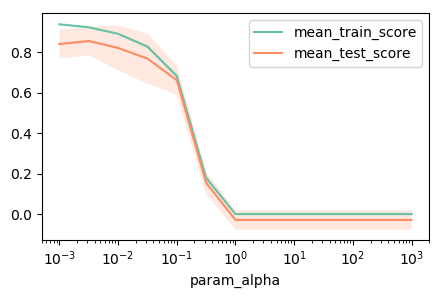

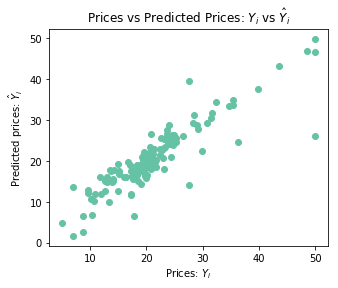

In [22]:
print_model_details(lasso_poly_grid,lasso_poly_results)
best_estimator = lasso_poly_grid.best_estimator_
y_pred= best_estimator.predict(X_test_poly)
real_vs_predict(y_test,y_pred)

#### ElasticNet is a linear regression model trained with L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 

#### We control the convex combination of L1 and L2 using the l1_ratio parameter. Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both. A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

In [23]:
 
from sklearn.linear_model import ElasticNet
param_grid = {'alpha': np.logspace(-4, -1, 10),
              'l1_ratio': [0.01, .1, .5, .9, .98, 1]}
elastic_net = ElasticNet(normalize=True, max_iter=1e6)
elastic_net_grid = create_grid_fit(X_train_poly,y_train,elastic_net,param_grid)
elastic_net_results = pd.DataFrame(elastic_net_grid.cv_results_)
elastic_net_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.117,0.014,6.997e-04,4.581e-04,0.0001,0.01,"{'alpha': 0.0001, 'l1_ratio': 0.01}",0.755,0.868,0.776,...,0.934,0.936,0.929,0.934,0.932,0.933,0.934,0.938,0.934,0.002
1,0.083,0.007,9.997e-04,3.447e-07,0.0001,0.1,"{'alpha': 0.0001, 'l1_ratio': 0.1}",0.745,0.865,0.779,...,0.935,0.936,0.930,0.935,0.932,0.934,0.935,0.939,0.935,0.002
2,0.083,0.009,4.001e-04,4.901e-04,0.0001,0.5,"{'alpha': 0.0001, 'l1_ratio': 0.5}",0.683,0.848,0.793,...,0.938,0.940,0.934,0.939,0.936,0.938,0.939,0.942,0.939,0.002
3,0.155,0.022,5.996e-04,4.896e-04,0.0001,0.9,"{'alpha': 0.0001, 'l1_ratio': 0.9}",0.565,0.806,0.805,...,0.943,0.944,0.940,0.944,0.941,0.943,0.944,0.946,0.944,0.002
4,0.212,0.044,6.998e-04,4.581e-04,0.0001,0.98,"{'alpha': 0.0001, 'l1_ratio': 0.98}",0.543,0.787,0.806,...,0.945,0.946,0.942,0.945,0.942,0.944,0.946,0.948,0.945,0.002


Best score: 0.860
Best parameters set:
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000000.0, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
{'alpha': 0.001, 'l1_ratio': 0.9}
0.8602300168431876
78


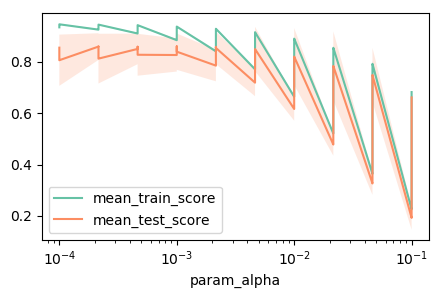

In [24]:
print_model_details(elastic_net_grid,elastic_net_results)

#### Analyzing grid results

In [25]:
elastic_pivot  =  pd.pivot_table(elastic_net_results,values='mean_test_score', index='param_alpha', columns='param_l1_ratio')

In [26]:
elastic_pivot = elastic_pivot.set_index(elastic_pivot.index.values.round(4))

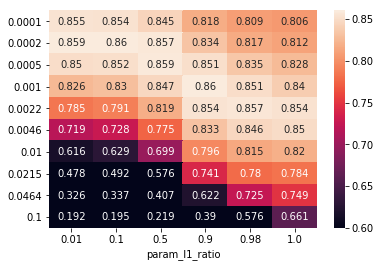

In [27]:
sns.heatmap(elastic_pivot, annot=True, fmt=".3g", vmin=0.6)

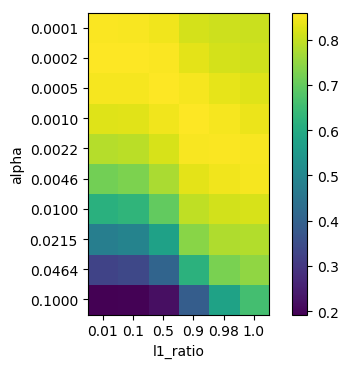

In [28]:
plt.figure(dpi=100)
plt.imshow(elastic_pivot) #, vmin=.70, vmax=.825)
plt.colorbar()
alphas = param_grid['alpha']
l1_ratio = np.array(param_grid['l1_ratio'])
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.yticks(range(len(alphas)), ["{:.4f}".format(a) for a in alphas])
plt.xticks(range(len(l1_ratio)), l1_ratio);

In [29]:
print("Elastic net best estimator:\n{0}".format(elastic_net_grid.best_estimator_))

Elastic net best estimator:
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000000.0, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [30]:
param_grid = {'alpha': np.logspace(-4, -1, 10), 'l1_ratio': [.98]}
print(param_grid)

elastic_net = ElasticNet(normalize=True, max_iter=1e6)
elastic_net_grid = create_grid_fit(X_train_poly,y_train,elastic_net,param_grid)
elastic_net_results = pd.DataFrame(elastic_net_grid.cv_results_)
elastic_net_results.head()



{'alpha': array([0.   , 0.   , 0.   , 0.001, 0.002, 0.005, 0.01 , 0.022, 0.046,
       0.1  ]), 'l1_ratio': [0.98]}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.201,4.343e-02,6.999e-04,4.582e-04,0.0001,0.98,"{'alpha': 0.0001, 'l1_ratio': 0.98}",0.543,0.787,0.806,...,0.945,0.946,0.942,0.945,0.942,0.944,0.946,0.948,0.945,0.002
1,0.093,2.177e-02,6.003e-04,4.901e-04,0.000215,0.98,"{'alpha': 0.00021544346900318845, 'l1_ratio': ...",0.566,0.803,0.798,...,0.943,0.945,0.940,0.944,0.941,0.943,0.944,0.947,0.944,0.002
2,0.040,8.911e-03,7.002e-04,4.584e-04,0.000464,0.98,"{'alpha': 0.00046415888336127773, 'l1_ratio': ...",0.649,0.830,0.786,...,0.940,0.942,0.936,0.940,0.938,0.940,0.941,0.944,0.941,0.002
3,0.019,2.373e-03,5.001e-04,5.001e-04,0.001,0.98,"{'alpha': 0.001, 'l1_ratio': 0.98}",0.735,0.850,0.763,...,0.934,0.937,0.930,0.935,0.933,0.935,0.935,0.938,0.935,0.002
4,0.010,6.995e-04,4.000e-04,4.899e-04,0.00215,0.98,"{'alpha': 0.002154434690031882, 'l1_ratio': 0.98}",0.836,0.874,0.706,...,0.926,0.927,0.920,0.926,0.923,0.925,0.926,0.930,0.926,0.003


Best score: 0.857
Best parameters set:
ElasticNet(alpha=0.002154434690031882, copy_X=True, fit_intercept=True,
      l1_ratio=0.98, max_iter=1000000.0, normalize=True, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)
{'alpha': 0.002154434690031882, 'l1_ratio': 0.98}
0.8570124902715271
64


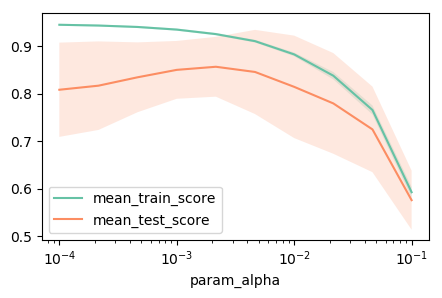

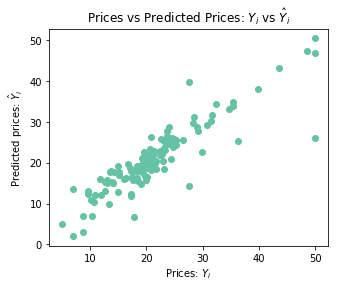

In [31]:
print_model_details(elastic_net_grid,elastic_net_results)
best_estimator = elastic_net_grid.best_estimator_
y_pred= best_estimator.predict(X_test_poly)
real_vs_predict(y_test,y_pred)

####  Have to study  HuberRegressor, RANSACRegressor , will update  this notebook  once completed